In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Conv1D, GlobalMaxPooling1D, Add, Attention, Reshape, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('ratings.csv')

In [ ]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1.112486e+09
1,1,29,3.5,1.112485e+09
2,1,32,3.5,1.112485e+09
3,1,47,3.5,1.112485e+09
4,1,50,3.5,1.112485e+09


from matplotlib import pyplot as plt
_df_0['movieId'].plot(kind='hist', bins=20, title='movieId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='movieId', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['userId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'userId'}, axis=1)
              .sort_values('userId', ascending=True))
  xs = counted['userId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('userId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('userId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['movieId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'movieId'}, axis=1)
              .sort_values('movieId', ascending=True))
  xs = counted['movieId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('movieId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('movieId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['rating']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'rating'}, axis=1)
              .sort_values('rating', ascending=True))
  xs = counted['rating']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('rating', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rating')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['movieId'].plot(kind='line', figsize=(8, 4), title='movieId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.userId=pd.Categorical(df.userId)
df['new_user_id']=df.userId.cat.codes#the numbering starts from 1 and 0

In [ ]:
df.movieId=pd.Categorical(df.movieId)
df['new_movie_id']=df.movieId.cat.codes

In [ ]:
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [ ]:
# Number of users and movies
N = len(set(user_ids))
M = len(set(movie_ids))

# Embedding dimension
K = 12

In [ ]:
X = np.array([user_ids, movie_ids]).T # Reshape data to be N x 2
y = ratings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
scaler = StandardScaler(with_std=False)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1)) # Scaler needs N x 1 numpy array
y_test_scaled = scaler.transform(y_test.reshape(-1,1)) # Scaler needs N x 1 numpy array

In [ ]:
# Reshape the data because we are passing in 2 different inputs
#X_train_reshaped = list([X_train_user, X_train_movie])
X_train_reshaped = list(X_train.T)
print(X_train_reshaped)
# X_test_reshaped = list([X_test_user, X_test_movie])
X_test_reshaped = list(X_test.T)
print(X_test_reshaped)

[array([ 902, 1858, 2944, ...,  901,  981,  818], dtype=int16), array([2328, 1216, 8950, ..., 2661, 1738,  858], dtype=int16)]
[array([ 954, 1041,  970, ...,  717,  450, 1056], dtype=int16), array([1582, 3106,  854, ..., 5715, 9191, 1611], dtype=int16)]


In [ ]:
# MODEL IS JUST ANN
u = Input(shape=(1,))

m = Input(shape=(1,))

u_emb = Embedding(N, K)(u) # Output Dimensions = num_samples x T x K = num_samples x 1 x K

m_emb = Embedding(M, K)(m) # Output Dimensions = num_samples x T x K = num_samples x 1

u_emb = Flatten()(u_emb) # Output Dimensions = num_samples x K

m_emb = Flatten()(m_emb) # Output Dimensions = num_samples x K

x = Concatenate()([u_emb, m_emb]) # Output Dimensions = num_samples x 2K

x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(1)(x)

model = Model(inputs = [u, m], outputs=x)

model.compile(optimizer=SGD(lr=0.1, momentum=0.9),
              loss = 'mse',
              metrics=['accuracy']
              )

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 12)                40572     ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 12)                147324    ['input_2[0][0]']             
                                                                                              

In [ ]:
r = model.fit(x=X_train_reshaped, y=y_train_scaled,
              validation_data = (X_test_reshaped, y_test_scaled),
              epochs = 25,
              batch_size = 1024,
              verbose = 2)

Epoch 1/40
8170/8170 - 362s - loss: 0.8875 - accuracy: 0.0000e+00 - val_loss: 0.7810 - val_accuracy: 0.0000e+00 - 362s/epoch - 44ms/step
Epoch 2/40
8170/8170 - 350s - loss: 0.7651 - accuracy: 0.0000e+00 - val_loss: 0.7469 - val_accuracy: 0.0000e+00 - 350s/epoch - 43ms/step
Epoch 3/40
8170/8170 - 340s - loss: 0.7474 - accuracy: 0.0000e+00 - val_loss: 0.7397 - val_accuracy: 0.0000e+00 - 340s/epoch - 42ms/step
Epoch 4/40
8170/8170 - 329s - loss: 0.7394 - accuracy: 0.0000e+00 - val_loss: 0.7323 - val_accuracy: 0.0000e+00 - 329s/epoch - 40ms/step
Epoch 5/40
8170/8170 - 339s - loss: 0.7290 - accuracy: 0.0000e+00 - val_loss: 0.7238 - val_accuracy: 0.0000e+00 - 339s/epoch - 42ms/step
Epoch 6/40
8170/8170 - 329s - loss: 0.7190 - accuracy: 0.0000e+00 - val_loss: 0.7170 - val_accuracy: 0.0000e+00 - 329s/epoch - 40ms/step
Epoch 7/40
8170/8170 - 350s - loss: 0.7103 - accuracy: 0.0000e+00 - val_loss: 0.7101 - val_accuracy: 0.0000e+00 - 350s/epoch - 43ms/step
Epoch 8/40
8170/8170 - 342s - loss: 0.703

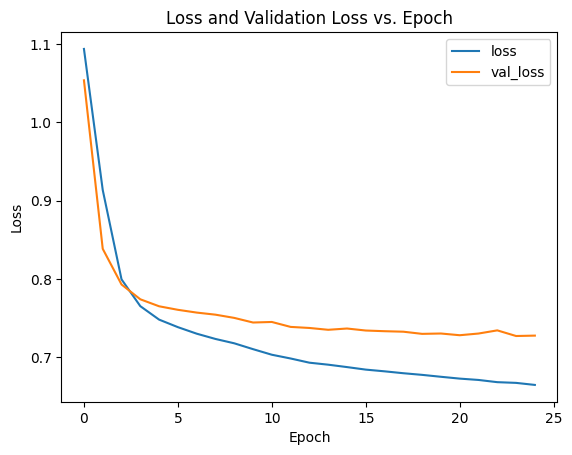

In [ ]:

# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

In [ ]:
np.sqrt(0.7276)
# 85% accuracy

0.8529947244854449